In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/Users/tancredicogne/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/tancredicogne/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [5]:
truth_table = pd.read_csv("preprocessed_data/ontology_truth_table.csv")
tree = pd.read_csv("preprocessed_data/ontology_tree.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'preprocessed_data/ontology_truth_table.csv'

In [5]:
all_infos = pd.read_csv("../data/preprocessed_data/metabolites_infos.csv")

/var/folders/f1/fcqwxxfn4sqbczpwghg752_c0000gn/T/ipykernel_39311/3299391134.py:1: DtypeWarning: Columns (8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,32,33,35,36,39,40,42,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  all_infos = pd.read_csv("../data/preprocessed_data/metabolites_infos.csv")


Text(0, 0.5, 'Count')

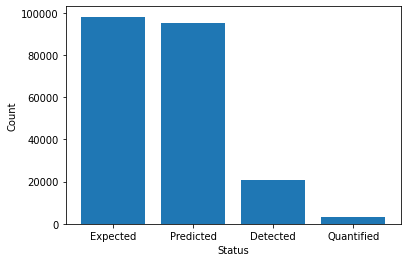

In [18]:
all_infos['status'].value_counts().values
plt.bar(['Expected', 'Predicted', 'Detected', 'Quantified'], all_infos['status'].value_counts().values)
plt.xlabel("Status")
plt.ylabel("Count")

In [3]:
quantified_ids = np.load("ids/quantified_ids.npy", allow_pickle=True)

In [14]:
mol_weight_df = all_infos[all_infos['accession'].isin(quantified_ids)].filter(['accession', 'Avg mol. weight']).dropna()
mol_weight_df.to_csv("mol_weight.csv", index=False)

In [13]:
mol_weight_df.dropna()

,accession,Avg mol. weight
0,HMDB0000001,169.1811
1,HMDB0000002,74.1249
2,HMDB0000005,102.0886
3,HMDB0000008,104.1050
4,HMDB0000010,300.3921
...,...,...
156692,HMDB0240295,374.3060
156693,HMDB0240296,366.3700
156920,HMDB0240623,203.2410
156938,HMDB0240642,250.3380


In [11]:
quantified_smiles = np.array(all_infos[all_infos['accession'].isin(quantified_ids)]['smiles'].values,dtype=str)

In [18]:
df_smiles = all_infos[all_infos['accession'].isin(quantified_ids)].filter(['accession', 'smiles'])

In [23]:
import pubchempy as pcp

In [21]:
df_smiles.to_csv("smiles_quantified.csv", index=False)

In [24]:
df_smiles2 = pd.read_csv("smiles_quantified.csv")

In [41]:
df_smiles2

,accession,smiles
0,HMDB0000001,CN1C=NC(C[C@H](N)C(O)=O)=C1
1,HMDB0000002,NCCCN
2,HMDB0000005,CCC(=O)C(O)=O
3,HMDB0000008,CC[C@H](O)C(O)=O
4,HMDB0000010,[H][C@@]12CCC(=O)[C@@]1(C)CC[C@]1([H])C3=C(CC[...
...,...,...
3380,HMDB0240295,NC1=C(N=CN1[C@@H]1O[C@H](CO)[C@@H](O)[C@H]1O)C...
3381,HMDB0240296,N[C@@H](CC1=C(NC2=CC=CC=C12)[C@H]1O[C@H](CO)[C...
3382,HMDB0240623,COC(=O)CCC1=CNC2=C1C=CC=C2
3383,HMDB0240642,CC(C)(C)C1=CC(=CC(=C1O)C(C)(C)C)C(O)=O


In [62]:
for index, row in df_smiles2.iterrows():
    if row['MolWeight'] == 2:
        print(row['smiles'])
        prop = pcp.get_properties(['MolecularWeight'],row['smiles'], 'smiles')
        if len(prop[0]) == 2:
            df_smiles2.at[index, 'MolWeight'] = prop[0]['MolecularWeight']
    if index % 250 == 0:
        print(index)

0
250
CC1=C(CCC(O)=O)\C2=C\C3=C(CC(O)=O)C(CCC(O)=O)=C(N3)\C=C3/N=C(/C=C4\N\C(=C/C1=N2)C(CCC(O)=O)=C4CC(O)=O)C(CCC(O)=O)=C3CC(O)=O
500
[Se++]


BadRequestError: 'PUGREST.BadRequest: error: '

In [52]:
df_smiles2

,accession,smiles,MolWeight
0,HMDB0000001,CN1C=NC(C[C@H](N)C(O)=O)=C1,169.18
1,HMDB0000002,NCCCN,74.13
2,HMDB0000005,CCC(=O)C(O)=O,102.09
3,HMDB0000008,CC[C@H](O)C(O)=O,104.10
4,HMDB0000010,[H][C@@]12CCC(=O)[C@@]1(C)CC[C@]1([H])C3=C(CC[...,300.4
...,...,...,...
3380,HMDB0240295,NC1=C(N=CN1[C@@H]1O[C@H](CO)[C@@H](O)[C@H]1O)C...,2.0
3381,HMDB0240296,N[C@@H](CC1=C(NC2=CC=CC=C12)[C@H]1O[C@H](CO)[C...,2.0
3382,HMDB0240623,COC(=O)CCC1=CNC2=C1C=CC=C2,2.0
3383,HMDB0240642,CC(C)(C)C1=CC(=CC(=C1O)C(C)(C)C)C(O)=O,2.0


In [36]:

for i, s in enumerate(df_smiles2['smiles'].values):
    prop = pcp.get_properties(['MolecularWeight'],s, 'smiles')
    print(df_smiles2['smiles'] == s)
    df_smiles2.at[df_smiles2['smiles'] == s, 'MolWeight'] = prop['MolecularWeight']
    df_smiles2.loc[df_smiles2['smiles'] == s, 'MolWeight'] = prop['MolecularWeight']
    if (i+1)%250==0:
        continue

0        True
1       False
2       False
3       False
4       False
        ...  
3380    False
3381    False
3382    False
3383    False
3384    False
Name: smiles, Length: 3385, dtype: bool


TypeError: list indices must be integers or slices, not str

In [78]:
level1_dic = {'Disposition': [], 'Physiological effect': [], 'Process': [], 'Role': []}
keys = ['Disposition', 'Physiological effect', 'Process', 'Role']
for node in tree['Node']:
    if node != 'Root' and node not in keys:
        curr_node = node
        while curr_node not in keys:
            curr_node = tree[tree['Node'] == curr_node]['Parent'].values[0]
        level1_dic.update({curr_node: level1_dic[curr_node] + [node]})


In [79]:
level1_dic

{'Disposition': ['Acetobacter',
  'Acetobacter aceti ',
  'Acetobacter suboxydans',
  'Achromobacter',
  'Achromobacter xylosoxydans',
  'Acidithiobacillus',
  'Acidithiobacillus caldus',
  'Acidithiobacillus ferrooxidans',
  'Acinetobacter',
  'Acinetobacter baumannii',
  'Actinobacillus',
  'Actinobacillus succinogenes ',
  'Actinobacteria',
  'Actinomycetaceae',
  'Actinomycetales',
  'Adipose tissue',
  'Adiposome',
  'Adrenal cortex',
  'Adrenal gland',
  'Aerococcus',
  'Aeromonas',
  'Aeromonas hydrophila',
  'Afipia',
  'Agrobacterium',
  'Agrobacterium tumefaciens',
  'Akkermansia',
  'Akkermansia muciniphilia',
  'Alcaligenes',
  'Alcaligenes eutrophus',
  'Algibacter',
  'Algibacter sp. AQP096',
  'Alicyclobacillus',
  'Alicyclobacillus acidocaldarius',
  'Alkalibaculum',
  'Alkalibaculum bacchi',
  'All tissues',
  'Alteromonas',
  'Amycolatopsis',
  'Anaerobiospirillum',
  'Anaerobiospirillum succiniciproducens',
  'Anaerococcus',
  'Anaerostipes',
  'Animal',
  'Aqueous h

In [53]:
truth_table['accession'].values

array(['HMDB0075712', 'HMDB0075713', 'HMDB0075714', ..., 'HMDB0085709',
       'HMDB0085710', 'HMDB0085711'], dtype=object)

In [3]:
all_infos

NameError: name 'all_infos' is not defined

In [22]:
detected = truth_table[all_infos['status']=="b'detected'"]
quantified = truth_table[all_infos['status']=="b'quantified'"]

In [42]:
quantified_new_ids = all_infos[all_infos['status']=="b'quantified'"]

In [45]:
detected_new_ids = all_infos[all_infos['status']=="b'detected'"]

In [61]:
np.unique(detected_new_ids['status'].values)

array(["b'detected'"], dtype=object)

In [62]:
detected_new_ids['accession'].values
np.save("detected_ids", detected_new_ids)

In [61]:
from matplotlib_venn import venn2
len(np.intersect1d(all_infos['accession'].values, truth_table['accession'].values))
print('HMDB0000001' in all_infos['accession'].values)
print('HMDB0000001' in truth_table['accession'].values)
print('HMDB0000001' in quantified_new_ids['accession'].values)
#venn2(all_infos['accession'].values, truth_table['accession'].values)

True
True
True


In [66]:
true_quantified = truth_table[truth_table['accession'].isin(quantified_new_ids['accession'].values)]

In [67]:
true_quantified

,accession,Physiological effect,Organoleptic effect,Touch,Smooth,Disposition,Route of exposure,Enteral,Ingestion,Biological location,...,Cupriavidus basilensis,Abetalipoproteinemia,Hypobetalipoproteinemia,Hemolytic uremic syndrome,Afipia,Lansoprazole Metabolism Pathway,Esomeprazole Metabolism Pathway,Sinus tachycardia,Eosinophilic esophagitis,Aspergillus glaucus
23195,HMDB0029147,False,False,False,False,True,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23205,HMDB0029165,False,False,False,False,True,False,False,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23223,HMDB0029185,False,False,False,False,True,False,False,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23232,HMDB0029201,False,False,False,False,True,False,False,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23235,HMDB0029205,True,True,True,True,True,True,True,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212845,HMDB0059835,True,False,False,False,True,True,True,True,True,...,NaN,NaN,NaN,NaN,NaN,False,False,NaN,False,False
212861,HMDB0059851,True,False,False,False,True,True,True,True,True,...,NaN,NaN,NaN,NaN,NaN,False,False,NaN,False,False
212912,HMDB0059905,True,False,False,False,True,True,True,True,True,...,NaN,NaN,NaN,NaN,NaN,False,False,NaN,False,False
212914,HMDB0059907,False,False,False,False,True,False,False,False,True,...,NaN,NaN,NaN,NaN,NaN,False,False,NaN,False,False


In [39]:
all_infos['status']=="b'quantified'"

0          True
1          True
2          True
3          True
4          True
          ...  
217915    False
217916    False
217917    False
217918    False
217919    False
Name: status, Length: 217920, dtype: bool

In [38]:
quantified_new

,accession,Physiological effect,Organoleptic effect,Touch,Smooth,Disposition,Route of exposure,Enteral,Ingestion,Biological location,...,Cupriavidus basilensis,Abetalipoproteinemia,Hypobetalipoproteinemia,Hemolytic uremic syndrome,Afipia,Lansoprazole Metabolism Pathway,Esomeprazole Metabolism Pathway,Sinus tachycardia,Eosinophilic esophagitis,Aspergillus glaucus
23195,HMDB0029147,False,False,False,False,True,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23205,HMDB0029165,False,False,False,False,True,False,False,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23223,HMDB0029185,False,False,False,False,True,False,False,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23232,HMDB0029201,False,False,False,False,True,False,False,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23235,HMDB0029205,True,True,True,True,True,True,True,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212845,HMDB0059835,True,False,False,False,True,True,True,True,True,...,NaN,NaN,NaN,NaN,NaN,False,False,NaN,False,False
212861,HMDB0059851,True,False,False,False,True,True,True,True,True,...,NaN,NaN,NaN,NaN,NaN,False,False,NaN,False,False
212912,HMDB0059905,True,False,False,False,True,True,True,True,True,...,NaN,NaN,NaN,NaN,NaN,False,False,NaN,False,False
212914,HMDB0059907,False,False,False,False,True,False,False,False,True,...,NaN,NaN,NaN,NaN,NaN,False,False,NaN,False,False


In [74]:
detected_ids = all_infos['accession'][all_infos['status']=="b'detected'"].values
np.save("ids/detected_ids", detected_ids)

In [20]:
detected_ids = [str(i) for i in detected['accession']]
quantified_ids = [str(i) for i in quantified['accession']]
detected_or_quantified_ids = detected_ids + quantified_ids
print(detected_or_quantified_ids)
with open("quantified_detected_IDs.txt", "w") as output:
    output.write(str(detected_or_quantified_ids))



['HMDB0075750', 'HMDB0075783', 'HMDB0075848', 'HMDB0075849', 'HMDB0075899', 'HMDB0075937', 'HMDB0075946', 'HMDB0075958', 'HMDB0075975', 'HMDB0075986', 'HMDB0075989', 'HMDB0075996', 'HMDB0076005', 'HMDB0076020', 'HMDB0076022', 'HMDB0076046', 'HMDB0076053', 'HMDB0076061', 'HMDB0076068', 'HMDB0076073', 'HMDB0076090', 'HMDB0076095', 'HMDB0076098', 'HMDB0076103', 'HMDB0076111', 'HMDB0076112', 'HMDB0076120', 'HMDB0076134', 'HMDB0076144', 'HMDB0076156', 'HMDB0076165', 'HMDB0076187', 'HMDB0076233', 'HMDB0076259', 'HMDB0076265', 'HMDB0076266', 'HMDB0076271', 'HMDB0076286', 'HMDB0076303', 'HMDB0076318', 'HMDB0076323', 'HMDB0076324', 'HMDB0076338', 'HMDB0076340', 'HMDB0076341', 'HMDB0076371', 'HMDB0076373', 'HMDB0076376', 'HMDB0076378', 'HMDB0076379', 'HMDB0076387', 'HMDB0076421', 'HMDB0076425', 'HMDB0076426', 'HMDB0076436', 'HMDB0076441', 'HMDB0076453', 'HMDB0076474', 'HMDB0076481', 'HMDB0076493', 'HMDB0076497', 'HMDB0076543', 'HMDB0076559', 'HMDB0076571', 'HMDB0076578', 'HMDB0076588', 'HMDB0076

In [21]:
np.save('quantified_detected_IDs.npy', np.array(detected_or_quantified_ids))
#quantified['accession'].to_csv('quantified_ids.csv', index=False)

In [18]:
level1_nodes = tree[tree['Level']==1]['Node'].values
level2_nodes = tree[tree['Level']==2]['Node'].values
level3_nodes = tree[tree['Level']==3]['Node'].values
level4_nodes = tree[tree['Level']==4]['Node'].values
level5_nodes = tree[tree['Level']==5]['Node'].values
level6_nodes = tree[tree['Level']==6]['Node'].values

['All tissues' 'Animal' 'Blood' 'Cell membrane' 'Cytoplasm' 'Endogenous'
 'Endoplasmic reticulum' 'Extracellular' 'Food' 'Heart' 'Ingestion'
 'Inner mitochondrial membrane' 'Intracellular membrane' 'Membrane'
 'Mitochondria']


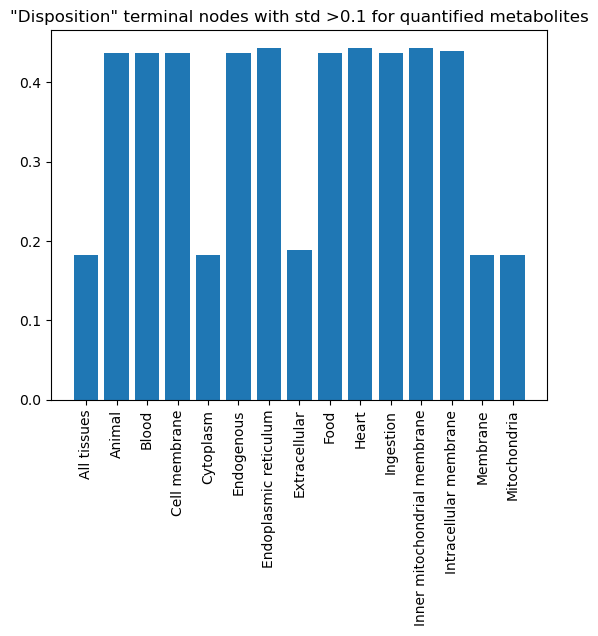

In [7]:
def select_nodes(node1):
    nodes = level1_dic[node1]
    quantified_truth_table = quantified.drop('accession', axis=1).fillna(False).filter(nodes)
    quantified_stds = quantified_truth_table.std().values
    mask1 = quantified_stds>0.1
    mask2 = [n not in tree['Parent'].values for n in nodes]
    mask = np.logical_and(mask1,mask2)
    quantified_filtered_nodes = quantified_truth_table.columns[mask]
    plt.bar(quantified_filtered_nodes, quantified_stds[mask]);
    plt.xticks(rotation=90);
    plt.title(f'"{node1}" terminal nodes with std >0.1 for quantified metabolites')
    return quantified_filtered_nodes.values
filtered_nodes = select_nodes('Disposition')
print(filtered_nodes)

In [156]:
truth_table.filter(filtered_nodes).fillna(False).corr().to_csv("filtered_disposition_nodes_correlations.csv")

In [28]:
print(len(t_sign))
print(len(quantified))
dic = {}
for i in t_sign:
    dic.update({i: tree[tree['Node']==i]['Level'].values[0]})

#print(len(all_sign))
#print(len(set(list(t_sign) + list(all_sign))))

76
3385


In [67]:
d = pd.DataFrame.from_dict(dic, orient='index', columns=['Level']).groupby('Level')
for key, item in d:
    print(d.get_group(key), "\n\n")

                      Level
Physiological effect      1
Disposition               1
Process                   1
Role                      1 


                             Level
Organoleptic effect              2
Route of exposure                2
Biological location              2
Source                           2
Naturally occurring process      2
Biological role                  2
Industrial application           2
Health effect                    2 


                          Level
Touch                         3
Enteral                       3
Organ and components          3
Subcellular                   3
Biofluid and excreta          3
Endogenous                    3
Food                          3
Biological                    3
Biological process            3
Energy storage                3
Energy source                 3
Membrane stabilizer           3
Surfactant                    3
Emulsifier                    3
Food and nutrition            3
Health condition           

In [7]:
import matplotlib.pyplot as plt
cols = ['Food', 'Endogenous', 'Ingestion', 'Cell membrane', 'Animal', 'Blood', 'Extracellular', 'Intracellular membrane', 'Membrane', 'Heart', 'Endoplasmic reticulum', 'Inner mitochondrial membrane', 'Cytoplasm', 'All tissues', 'Mitochondria', 'Adiposome', 'Adipose tissue', 'Urine']
#detected_or_quantified.drop('accession', axis=1).fillna(False).value_counts().values
#detected_or_quantified.filter(cols).fillna(False).value_counts().values
detected_or_quantified = pd.concat([quantified, detected])

In [25]:
role_filtered.columns

Index(['Abortifacient agent', 'Acaricide', 'Acidity regulator', 'Acidogen',
       'Adjuvant', 'Air pollutant', 'Alcohol antagonists', 'Alcohol deterrent',
       'Allergen', 'Amebicide',
       ...
       'Uv filter', 'Vaccine', 'Vasopeptidase inhibitor', 'Vasorelaxant',
       'Vitamin', 'Vitamin d3 receptor inhibitor', 'Vitamin k antagonists',
       'Waste product', 'Water pollutant', 'Xenobiotic'],
      dtype='object', length=222)

In [51]:
selected_cols = ['accession', 'All tissues', 'Animal', 'Blood', 'Cell membrane', 'Cytoplasm', 'Endogenous', 'Endoplasmic reticulum',
        'Extracellular', 'Food', 'Heart', 'Ingestion', 'Inner mitochondrial membrane', 'Intracellular membrane', 'Membrane', 'Mitochondria']
quantified_truth_table = truth_table.drop('accession', axis=1).fillna(False).filter(disposition_filtered.columns)
quantified_stds = quantified_truth_table.std().values

KeyboardInterrupt: 

In [71]:
true_quantified

,accession,Physiological effect,Organoleptic effect,Touch,Smooth,Disposition,Route of exposure,Enteral,Ingestion,Biological location,...,Cupriavidus basilensis,Abetalipoproteinemia,Hypobetalipoproteinemia,Hemolytic uremic syndrome,Afipia,Lansoprazole Metabolism Pathway,Esomeprazole Metabolism Pathway,Sinus tachycardia,Eosinophilic esophagitis,Aspergillus glaucus
23195,HMDB0029147,False,False,False,False,True,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23205,HMDB0029165,False,False,False,False,True,False,False,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23223,HMDB0029185,False,False,False,False,True,False,False,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23232,HMDB0029201,False,False,False,False,True,False,False,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23235,HMDB0029205,True,True,True,True,True,True,True,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212845,HMDB0059835,True,False,False,False,True,True,True,True,True,...,NaN,NaN,NaN,NaN,NaN,False,False,NaN,False,False
212861,HMDB0059851,True,False,False,False,True,True,True,True,True,...,NaN,NaN,NaN,NaN,NaN,False,False,NaN,False,False
212912,HMDB0059905,True,False,False,False,True,True,True,True,True,...,NaN,NaN,NaN,NaN,NaN,False,False,NaN,False,False
212914,HMDB0059907,False,False,False,False,True,False,False,False,True,...,NaN,NaN,NaN,NaN,NaN,False,False,NaN,False,False


In [94]:
nodes = tree['Node'].values
disposition_nodes = level1_dic['Disposition']
mask = [n not in tree['Parent'].values for n in disposition_nodes]
terminal_disposition_nodes = np.array(disposition_nodes)[np.array(mask)]

In [95]:
phys_effect_nodes = level1_dic['Physiological effect']
mask = [n not in tree['Parent'].values for n in phys_effect_nodes]
terminal_phys_effect_nodes = np.array(phys_effect_nodes)[np.array(mask)]

In [96]:
role_nodes = level1_dic['Role']
mask = [n not in tree['Parent'].values for n in role_nodes]
terminal_role_nodes = np.array(role_nodes)[np.array(mask)]

In [97]:
process_nodes = level1_dic['Process']
mask = [n not in tree['Parent'].values for n in process_nodes]
terminal_process_nodes = np.array(process_nodes)[np.array(mask)]

In [99]:
np.save("terminal_disposition_nodes", terminal_disposition_nodes)
np.save("terminal_role_nodes", terminal_role_nodes)
np.save("terminal_process_nodes", terminal_process_nodes)
np.save("terminal_physiological_effect_nodes", terminal_phys_effect_nodes)

In [72]:
quantified_stds = true_quantified.drop(columns=['accession']).std().values

In [100]:

quantified_truth_table = truth_table.drop('accession', axis=1).fillna(False).filter(terminal_disposition_nodes)
quantified_stds = quantified_truth_table.std().values

Text(0.5, 1.0, 'Histogram of standard deviation of ontology terms (corrected)')

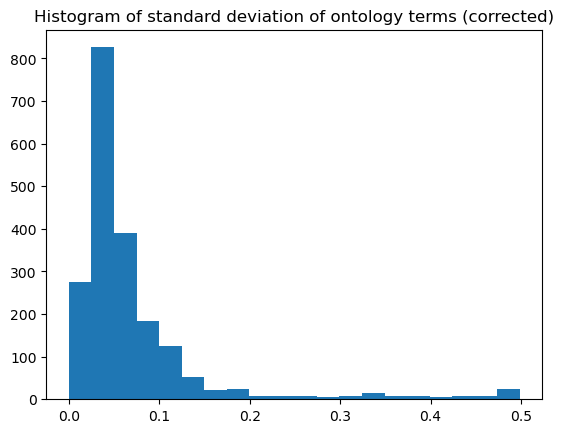

In [76]:
#plt.hist(quantified.drop('accession', axis=1).sum().values, bins=20)
quantified_truth_table = truth_table.drop('accession', axis=1).fillna(False).filter(terminal_disposition_nodes)
quantified_stds = quantified_truth_table.std().values
plt.hist(quantified_stds, bins=20)
plt.title("Histogram of standard deviation of ontology terms (corrected)")

In [20]:
import numpy as np
def get_all_leafs(node):   
    all_nodes = []
    count1 = 0
    count2 = 0
    count3 = 0
    count4 = 0
    for n in tree[tree['Parent'] == node]['Node'].values:
        is_n_term = True
        count1 +=1
        for n_i in tree[tree['Parent'] == n]['Node'].values:
            is_n_term = False
            is_n_i_term = True
            count2+=1
            for n_j in tree[tree['Parent']==n_i]['Node'].values:
                is_n_i_term = False
                is_n_j_term = True
                count3+=1
                for n_k in tree[tree['Parent']==n_j]['Node'].values:
                    is_n_j_term = False
                    all_nodes.append(n_k)
                    count4+=1
                if is_n_j_term: all_nodes.append(n_j)
            if is_n_i_term: all_nodes.append(n_i)
        if is_n_term: all_nodes.append(n)
    all_nodes = np.unique(all_nodes)
    print(len(all_nodes))
    return all_nodes

In [21]:
role = truth_table[truth_table['Role'] == True]
role_filtered = role[get_all_leafs('Role')]

222


In [31]:
physio_effect = truth_table[truth_table['Physiological effect'] == True]
physio_effect_filtered = physio_effect[get_all_leafs('Physiological effect')]

501


In [39]:
process = truth_table[truth_table['Process'] == True]
process_filtered = process[get_all_leafs('Process')]

655


In [45]:
disposition = truth_table[truth_table['Disposition'] == True]
disposition_filtered = disposition[get_all_leafs('Disposition')]

303


In [37]:
physio_effect_filtered.drop_duplicates()

,11-beta-hydroxylase deficiency,2-aminoadipic aciduria,2-hydroxyglutaric aciduria,2-ketoadipic acidemia,21-hydroxylase deficiency,3-methyl-crotonyl-glycinuria,3-methylglutaconic aciduria,"3-methylglutaconic aciduria type ii, x-linked",Abdominal pain,Abetalipoproteinemia,...,Vertigo,Very long chain acyl-coa dehydrogenase deficiency,Vessel occlusion,Viral infection,Vitamin b12 deficiency,Vitiligo,Vomiting,Weight loss,Wilson's disease,Xanthinuria
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10073,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,...,False,NaN,NaN,NaN,NaN,False,False,False,NaN,NaN
22992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,...,False,NaN,NaN,NaN,NaN,False,False,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,...,False,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN
212820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,...,True,NaN,NaN,NaN,NaN,NaN,True,False,NaN,NaN
212845,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,...,False,NaN,NaN,NaN,NaN,NaN,True,True,NaN,NaN
212910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,...,False,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN


In [18]:
disposition_filtered.drop_duplicates()

,Acetobacter,Achromobacter,Acidithiobacillus,Acinetobacter,Actinobacillus,Actinobacteria,Actinomycetaceae,Actinomycetales,Adipose tissue,Adiposome,...,White blood cell,Williopsis,Wolinella,Xenorhabdus,Yarrowia,Yeast,Yokenella,Zeaxanthinibacter,Zygosaccharomyces,Zymomonas
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10073,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212897,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212918,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
role_filtered.drop_duplicates()

,Abortifacient agent,Acaricide,Acidity regulator,Acidogen,Adjuvant,Air pollutant,Alcohol antagonists,Alcohol deterrent,Allergen,Amebicide,...,Uv filter,Vaccine,Vasopeptidase inhibitor,Vasorelaxant,Vitamin,Vitamin d3 receptor inhibitor,Vitamin k antagonists,Waste product,Water pollutant,Xenobiotic
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10073,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212845,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN
212848,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN
212890,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True,NaN
212910,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True,NaN


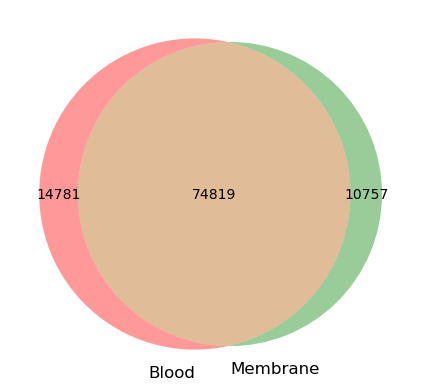

In [29]:
from matplotlib_venn import venn2
df = disposition_filtered
values = df.sum(axis=0)
sorted_values = values.sort_values()
top_index =list(sorted_values.index.values[-25:])
top_index.reverse()
top_values =list(sorted_values.values[-25:])
top_values.reverse()
i = 5
j = 8
subsets_data = (len(df[(df[top_index[i]]==True) & (df[top_index[j]]==False)]), 
                len(df[(df[top_index[i]]==False) & (df[top_index[j]]==True)]), 
                len(df[(df[top_index[i]]==True) & (df[top_index[j]]==True)]))
venn2(subsets=subsets_data, 
      set_labels=(top_index[i], top_index[j]))

In [38]:
import matplotlib.pyplot as plt
def barplot_from_filtered_node(filtered_df):
    values = filtered_df.sum(axis=0)
    sorted_values = values.sort_values()
    top_index =list(sorted_values.index.values[-20:])
    top_index.reverse()
    top_values =list(sorted_values.values[-20:])
    top_values.reverse()
    print(top_values)
    plt.bar(top_index, top_values)
    plt.xticks(rotation=80);
    plt.title("Top terminal nodes of Disposition")
    return top_index
    

[138753, 138749, 138749, 110211, 110211, 89068, 89039, 41074, 11532, 2118, 2042, 1489, 1168, 1150, 948, 288, 243, 197, 142, 131, 123, 101, 101, 99, 97]


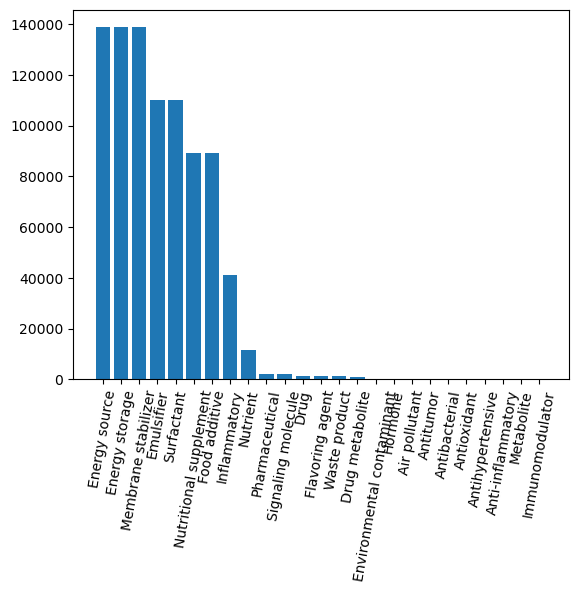

In [7]:
barplot_from_filtered_node(role_filtered)

[146742, 145377, 144681, 144413, 138319, 132632, 108561, 88504, 85576, 83483, 83468, 83338, 68816, 57306, 56534, 39189, 38865, 7516, 2022, 1584]


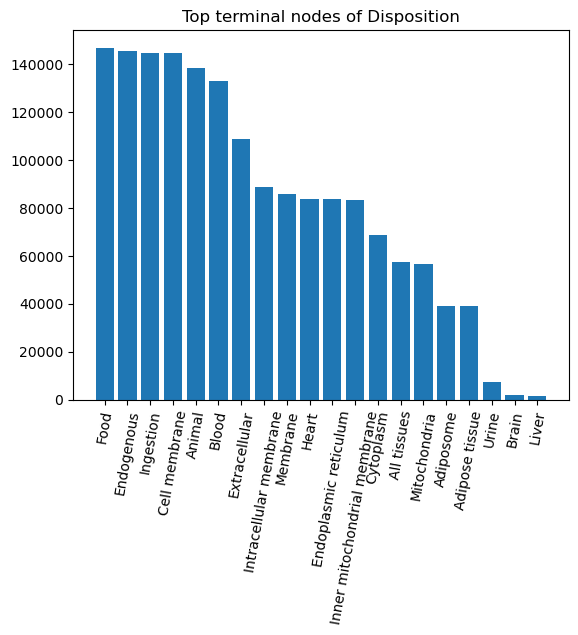

In [39]:
top_disposition = barplot_from_filtered_node(disposition_filtered)

In [35]:
ys = pd.read_csv("processed_data_04_18_24/filtered_outputs.csv")

In [41]:
cols = ys.columns
print(top_disposition)
for t in top_disposition:
    print(t in cols)

['Food', 'Endogenous', 'Ingestion', 'Cell membrane', 'Animal', 'Blood', 'Extracellular', 'Intracellular membrane', 'Membrane', 'Heart', 'Endoplasmic reticulum', 'Inner mitochondrial membrane', 'Cytoplasm', 'All tissues', 'Mitochondria', 'Adiposome', 'Adipose tissue', 'Urine', 'Brain', 'Liver']
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [72]:
ys.set_index('accession')
ys.loc[ys['accession']==id].values[0,1:]

array([False, False, False, False, False, False, False, False, True,
       False, True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, True, False, False,
       False, False, False, False, False, True, False, False, False,
       False, False, False,

In [3]:
import pandas as pd
ys = pd.read_csv("preprocessed_data/baseline_model_y.csv")

In [58]:
ys_filtered = ys[ys['accession'].isin(ids)]

In [20]:
truth_table

,accession,Physiological effect,Organoleptic effect,Touch,Smooth,Disposition,Route of exposure,Enteral,Ingestion,Biological location,...,Cupriavidus basilensis,Abetalipoproteinemia,Hypobetalipoproteinemia,Hemolytic uremic syndrome,Afipia,Lansoprazole Metabolism Pathway,Esomeprazole Metabolism Pathway,Sinus tachycardia,Eosinophilic esophagitis,Aspergillus glaucus
0,HMDB0075712,True,True,True,True,True,True,True,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,HMDB0075713,True,True,True,True,True,True,True,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,HMDB0075714,True,True,True,True,True,True,True,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,HMDB0075715,True,True,True,True,True,True,True,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,HMDB0075716,True,True,True,True,True,True,True,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217915,HMDB0085707,True,True,True,True,True,True,True,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217916,HMDB0085708,True,True,True,True,True,True,True,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217917,HMDB0085709,True,True,True,True,True,True,True,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217918,HMDB0085710,True,True,True,True,True,True,True,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
quantified_ids = np.load("ids/quantified_ids.npy", allow_pickle = True)
print(len(quantified_ids))
detected_ids = np.load("ids/detected_ids.npy", allow_pickle=True)
print(len(detected_ids))

FileNotFoundError: [Errno 2] No such file or directory: 'ids/quantified_ids.npy'

In [6]:
truth_table = pd.read_csv("../data/preprocessed_data/ontology_truth_table.csv")
tree = pd.read_csv("../data/preprocessed_data/ontology_tree.csv")
terminal_disposition_nodes = ['accession'] + list(np.load("terminal_nodes/terminal_disposition_nodes.npy"))
disposition_truth_table = truth_table[terminal_disposition_nodes]

KeyboardInterrupt: 

In [125]:
quantified_truth_table = disposition_truth_table[truth_table['accession'].isin(quantified_ids)]

In [126]:
detected_truth_table = disposition_truth_table[truth_table['accession'].isin(detected_ids)]

In [5]:
import numpy as np
import pandas as pd
quantified_ids = np.load("ids/quantified_ids.npy", allow_pickle = True)
#truth_table = pd.read_csv("preprocessed_data/ontology_truth_table.csv")

In [6]:
def filter_terminal_nodes(level_1_node, ids):
    terminal_nodes = ['accession'] + list(np.load(f"terminal_nodes/terminal_{level_1_node}_nodes.npy"))
    curr_truth_table = truth_table[terminal_nodes]
    quantified_truth_table = curr_truth_table[truth_table['accession'].isin(ids)]
    quantified_truth_table = quantified_truth_table.fillna(False).drop('accession', axis=1)
    quantified_truth_table_stds = quantified_truth_table.std().values
    filtered_terminal_nodes = quantified_truth_table.columns[quantified_truth_table_stds > 0.3]
    print(len(filtered_terminal_nodes))
    np.save(f"filtered_nodes/filtered_terminal_{level_1_node}_nodes_0_3", filtered_terminal_nodes)
filter_terminal_nodes('disposition', quantified_ids)

23


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

truth_table = pd.read_csv("../data/preprocessed_data/ontology_truth_table.csv")
terminal_disposition_nodes = ['accession'] + list(np.load("../data/preprocessed_data/terminal_nodes/terminal_disposition_nodes.npy"))
disposition_truth_table = truth_table[terminal_disposition_nodes]

/var/folders/f1/fcqwxxfn4sqbczpwghg752_c0000gn/T/ipykernel_51986/3222265288.py:5: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251

In [2]:
quantified_ids = np.load("../data/preprocessed_data/quantified_ids.npy", allow_pickle = True)
detected_ids = np.load("../data/preprocessed_data/detected_ids.npy", allow_pickle=True)

In [3]:
all_ids = truth_table['accession'].values

In [4]:
all_ids
expected_or_predicted_ids = [i for i in all_ids if i not in quantified_ids and i not in detected_ids]

In [5]:
np.array(expected_or_predicted_ids)

array(['HMDB0075712', 'HMDB0075713', 'HMDB0075714', ..., 'HMDB0085709',
       'HMDB0085710', 'HMDB0085711'], dtype='<U11')

In [6]:
print(len(all_ids))
print(len(expected_or_predicted_ids))
print(len(quantified_ids))
print(len(detected_ids))
np.save("../data/preprocessed_data/expected_or_predicted_ids.npy", np.array(expected_or_predicted_ids))

217920
193611
3385
20924


Text(0.5, 0, 'Std across detected and quantified metabolites')

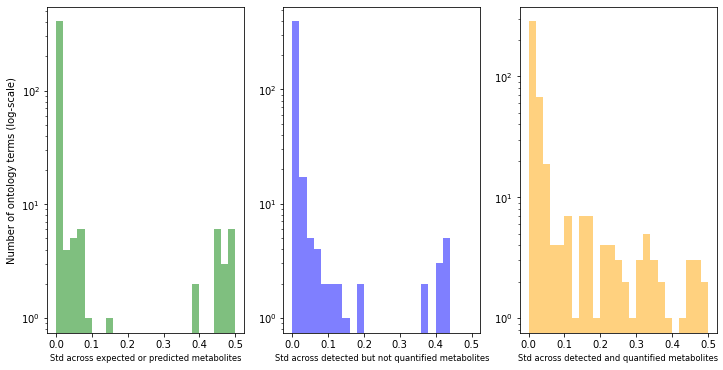

In [8]:

quantified_ids = np.load("../data/preprocessed_data/quantified_ids.npy", allow_pickle = True)
detected_ids = np.load("../data/preprocessed_data/detected_ids.npy", allow_pickle=True)
expected_or_predicted_ids = np.load("../data/preprocessed_data/expected_or_predicted_ids.npy", allow_pickle=True)

quantified_truth_table = disposition_truth_table[truth_table['accession'].isin(quantified_ids)]
detected_truth_table = disposition_truth_table[truth_table['accession'].isin(detected_ids)]
expected_or_predicted_truth_table = disposition_truth_table[truth_table['accession'].isin(expected_or_predicted_ids)]

fig, axes = plt.subplots(1, 3, figsize=(12, 6))  # 1 row, 2 columns


hist1 = expected_or_predicted_truth_table.fillna(False).drop('accession', axis=1)
hist1_stds = hist1.std().values

hist2 = detected_truth_table.fillna(False).drop('accession', axis=1)
hist2_stds = hist2.std().values
#plt.hist(hist2_stds, bins=20, alpha=0.7, label='detected')

hist3 = quantified_truth_table.fillna(False).drop('accession', axis=1)
hist3_stds = hist3.std().values
#plt.hist(hist3_stds, bins=20, alpha=0.7, label ='quantified')


bins=np.histogram(np.hstack((hist1_stds, hist2_stds,hist3_stds)), bins=25)[1] #get the bin edges
axes[0].hist(hist1_stds, bins=bins, alpha=0.5,  color='green', log=True)
axes[1].hist(hist2_stds,bins=bins, alpha=0.5, color='blue', log=True)
axes[2].hist(hist3_stds, bins=bins, alpha=0.5, color='orange', log=True)
axes[0].set_ylabel("Number of ontology terms (log-scale)")
#fig.suptitle("Histogram of standard deviation of terminal 'Disposition' nodes")
axes[0].set_xlabel("Std across expected or predicted metabolites", fontsize='small')
axes[1].set_xlabel("Std across detected but not quantified metabolites", fontsize='small')
axes[2].set_xlabel("Std across detected and quantified metabolites", fontsize='small')


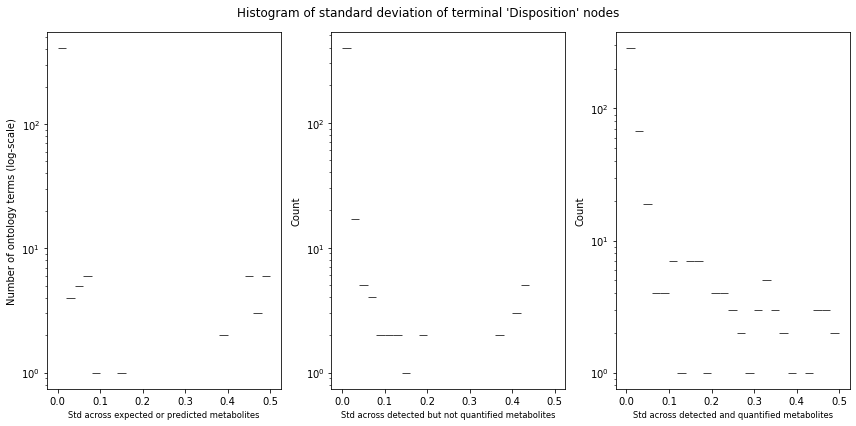

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 3, figsize=(12, 6))  # 1 row, 3 columns

hist1 = expected_or_predicted_truth_table.fillna(False).drop('accession', axis=1)
hist1_stds = hist1.std().values

hist2 = detected_truth_table.fillna(False).drop('accession', axis=1)
hist2_stds = hist2.std().values

hist3 = quantified_truth_table.fillna(False).drop('accession', axis=1)
hist3_stds = hist3.std().values

bins = np.histogram(np.hstack((hist1_stds, hist2_stds, hist3_stds)), bins=25)[1]  # get the bin edges

# Plot histograms using Seaborn
sns.histplot(hist1_stds, bins=bins, ax=axes[0], color='green', log_scale=(False, True), kde=False, alpha=0.5)
sns.histplot(hist2_stds, bins=bins, ax=axes[1], color='blue', log_scale=(False, True), kde=False, alpha=0.5)
sns.histplot(hist3_stds, bins=bins, ax=axes[2], color='orange', log_scale=(False, True), kde=False, alpha=0.5)

axes[0].set_ylabel("Number of ontology terms (log-scale)")
axes[0].set_xlabel("Std across expected or predicted metabolites", fontsize='small')
axes[1].set_xlabel("Std across detected but not quantified metabolites", fontsize='small')
axes[2].set_xlabel("Std across detected and quantified metabolites", fontsize='small')

fig.suptitle("Histogram of standard deviation of terminal 'Disposition' nodes")

plt.tight_layout()
plt.show()


/var/folders/f1/fcqwxxfn4sqbczpwghg752_c0000gn/T/ipykernel_64230/1739152341.py:15: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  hist1 = disposition_truth_table.fillna(False).drop('accession', axis=1)
/var/folders/f1/fcqwxxfn4sqbczpwghg752_c0000gn/T/ipykernel_64230/1739152341.py:18: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  hist2 = quantified_truth_table.fillna(False).drop('accession', axis=1)
/var/folders/f1/fcqwxxfn4sqbczpwghg752_c0000gn/T/ipykernel_64230/1739152341.py:22: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is

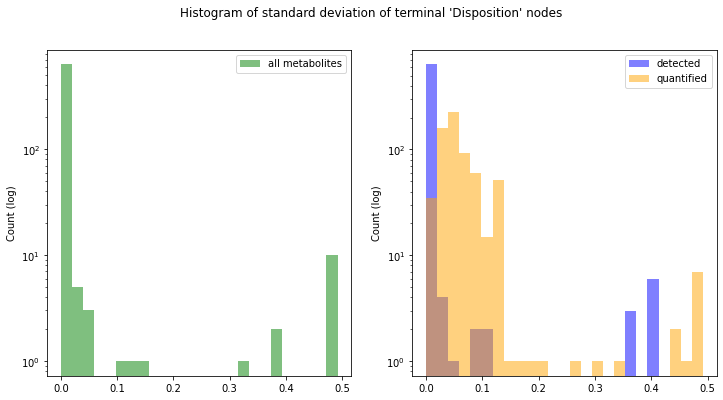

In [50]:
quantified_ids = np.load("../data/preprocessed_data/quantified_ids.npy", allow_pickle = True)
detected_ids = np.load("../data/preprocessed_data/detected_ids.npy", allow_pickle=True)

quantified_truth_table = disposition_truth_table[truth_table['accession'].isin(quantified_ids)]
detected_truth_table = disposition_truth_table[truth_table['accession'].isin(detected_ids)]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns


hist1 = disposition_truth_table.fillna(False).drop('accession', axis=1)
hist1_stds = hist1.std().values

hist2 = quantified_truth_table.fillna(False).drop('accession', axis=1)
hist2_stds = hist2.std().values
#plt.hist(hist2_stds, bins=20, alpha=0.7, label='quantified')

hist3 = detected_truth_table.fillna(False).drop('accession', axis=1)
hist3_stds = hist3.std().values
#plt.hist(hist3_stds, bins=20, alpha=0.7, label ='detected')


bins=np.histogram(np.hstack((hist1_stds, hist2_stds,hist3_stds)), bins=25)[1] #get the bin edges
axes[0].hist(hist1_stds, bins=bins, alpha=0.5, label ='all metabolites', color='green', log=True)
axes[1].hist(hist3_stds,bins=bins, alpha=0.5, label ='detected', color='blue', log=True)
axes[1].hist(hist2_stds, bins=bins, alpha=0.5, label='quantified', color='orange', log=True)
axes[1].set_ylabel("Count (log)")
axes[0].set_ylabel("Count (log)")
fig.suptitle("Histogram of standard deviation of terminal 'Disposition' nodes")
axes[0].legend()
axes[1].legend()

In [53]:
sorted_data = hist2.std().sort_values(ascending=False)
num_elements_to_retain = int(len(sorted_data) * 0.1)

# Ensure at least one element is retained if the number of elements is less than 20
num_elements_to_retain = max(1, num_elements_to_retain)

# Slice the Series to retain only the top 5% of values
top_5_percent = sorted_data.iloc[:num_elements_to_retain]

In [44]:
terminal_disposition_nodes = ['accession'] + list(np.load("../data/preprocessed_data/terminal_nodes/terminal_role_nodes.npy"))
disposition_truth_table = truth_table[terminal_disposition_nodes]
quantified_ids = np.load("../data/preprocessed_data/quantified_ids.npy", allow_pickle = True)
detected_ids = np.load("../data/preprocessed_data/detected_ids.npy", allow_pickle=True)

quantified_truth_table = disposition_truth_table[truth_table['accession'].isin(quantified_ids)]
detected_truth_table = disposition_truth_table[truth_table['accession'].isin(detected_ids)]

hist2 = quantified_truth_table.fillna(False).drop('accession', axis=1)
hist2_stds = hist2.std().values
median = np.median(hist2_stds)
dist = np.abs(hist2_stds - median)
mad = np.sum(dist) / len(hist2_stds)
adjusted = 0.6745 * dist/mad
new_list = hist2.columns[adjusted > 3.5]
np.save("../data/preprocessed_data/filtered_nodes/filtered_terminal_role_nodes_mad.npy", new_list)


/var/folders/f1/fcqwxxfn4sqbczpwghg752_c0000gn/T/ipykernel_86166/2994569964.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  hist2 = quantified_truth_table.fillna(False).drop('accession', axis=1)


In [39]:
old_list = np.load("../data/preprocessed_data/filtered_nodes/filtered_terminal_process_nodes.npy", allow_pickle=True)

In [40]:
print(len([i for i in new_list if i in old_list]))
print(len(new_list))

14
14


In [ ]:
quantified_ids = np.load("../data/preprocessed_data/quantified_ids.npy", allow_pickle = True)
detected_ids = np.load("../data/preprocessed_data/detected_ids.npy", allow_pickle=True)

quantified_truth_table = disposition_truth_table[truth_table['accession'].isin(quantified_ids)]
detected_truth_table = disposition_truth_table[truth_table['accession'].isin(detected_ids)]

hist2 = quantified_truth_table.fillna(False).drop('accession', axis=1)
hist2_stds = hist2.std().values
median = np.median(hist2_stds)
dist = np.abs(hist2_stds - median)
mad = np.sum(dist) / len(hist2_stds)
print(median)
mad

In [54]:
print(len(top_5_percent))
top_5_percent

65


Cell signaling                0.481041
Lipid metabolism              0.479058
Lipid metabolism pathway      0.479058
Lipid peroxidation            0.479058
Lipid transport               0.478881
                                ...   
Antipyrine Action Pathway     0.119458
Antrafenine Action Pathway    0.119458
Valdecoxib Action Pathway     0.119458
Tolmetin Action Pathway       0.119458
Fenoprofen Action Pathway     0.119458
Length: 65, dtype: float64

In [40]:
disposition_truth_table.to_csv("terminal_physiological_effect_nodes_y.csv", index=False)